In [1]:
from astropy.io import fits
import Transmission_calculation as trans
from astropy import units as u
import numpy as np
import math
from astropy.modeling.functional_models import Disk2D
from astropy.modeling.models import Gaussian2D
from astropy.modeling.models import Moffat2D
import matplotlib.pyplot as plt
import poppy
plt.style.use('bmh')

In [2]:
diameter=0.6*u.arcsec
wavelength=440*u.nm
axis_val=25
offset=0.2*u.arcsec

file=fits.open("PSFs/GLAO_Median_{}nm.fits".format(round(wavelength.value)))
durham_data=file['PRIMARY'].data[axis_val]
scale=file[0].header['scale']

boundary=len(durham_data)

x = np.arange(0, boundary)
y = np.arange(0, boundary)
x, y = np.meshgrid(x, y)

disk=Disk2D(1,boundary/2+int(offset.value/scale),boundary/2,diameter.value/2/scale)
disk_data=disk(x,y)

convolved_data=durham_data*disk_data
trans=sum(sum(convolved_data))

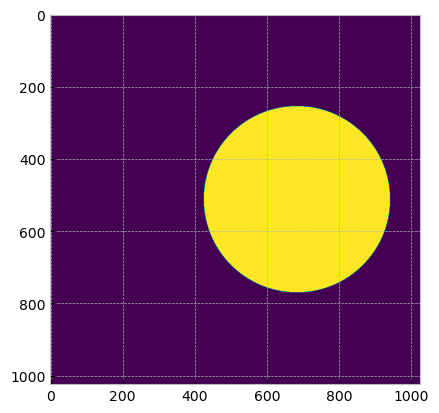

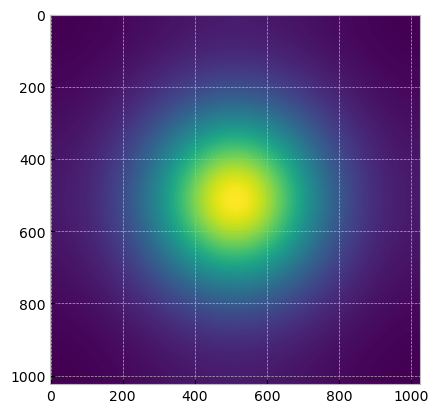

In [3]:
plt.imshow(disk_data)
plt.figure()
plt.imshow(durham_data)

In [4]:
print(trans)

0.41224803567206886


In [6]:
def numerical_durham_v2(diameter,wavelength,offset,axis_val):
    file=fits.open("PSFs/GLAO_Median_{}nm.fits".format(round(wavelength.value)))
    durham_data=file['PRIMARY'].data[axis_val]
    scale=file[0].header['scale']

    boundary=len(durham_data)

    x = np.arange(0, boundary)
    y = np.arange(0, boundary)
    x, y = np.meshgrid(x, y)

    disk=Disk2D(1,boundary/2+(offset.value/scale),boundary/2,diameter.value/2/scale)
    disk_data=disk(x,y)

    disk_data=disk_data[int(boundary/2-diameter.value/2/scale):int(boundary/2+diameter.value/2/scale)+1,int(boundary/2-diameter.value/2/scale+offset.value/scale):int(boundary/2+diameter.value/2/scale+offset.value/scale)+1]
    durham_data=durham_data[int(boundary/2-diameter.value/2/scale):int(boundary/2+diameter.value/2/scale)+1,int(boundary/2-diameter.value/2/scale+offset.value/scale):int(boundary/2+diameter.value/2/scale+offset.value/scale)+1]

    convolved_data=durham_data*disk_data
    trans=sum(sum(convolved_data))
    return trans

In [7]:
def numerical_durham_speed(diameter,wavelength,offset,axis_val):

    file=fits.open("PSFs/GLAO_Median_{}nm.fits".format(round(wavelength.value)))
    durham_data=file['PRIMARY'].data[axis_val]
    scale=file[0].header['scale']

    boundary=math.ceil(diameter.value/2/scale)

    x = np.arange(-boundary,boundary+1)
    y = np.arange(-boundary, boundary+1)
    x, y = np.meshgrid(x, y)

    snipped_durham_data=durham_data[int(len(durham_data)/2)-boundary+int(offset.value/scale):int(len(durham_data)/2)+boundary+1+int(offset.value/scale),int(len(durham_data)/2)-boundary:int(len(durham_data)/2)+boundary+1]

    width=np.shape(snipped_durham_data)[0]
    height=np.shape(snipped_durham_data)[1]
    if width != height:
        new_array=np.zeros((height,height))
        new_array[0:width]=snipped_durham_data
        snipped_durham_data=new_array
        
    disk=Disk2D(1,0,0,diameter.value/2/scale)
    disk_data=disk(x,y)

    convolved_data=snipped_durham_data*disk_data
    trans=sum(sum(convolved_data))
    return trans

In [8]:
def numerical_durham(diameter,wavelength,offset,axis_val):
    file=fits.open("PSFs/GLAO_Median_{}nm.fits".format(round(wavelength.value)))
    durham_data=file['PRIMARY'].data[axis_val]
    scale=file[0].header['scale']

    boundary=len(durham_data)

    x = np.arange(0, boundary)
    y = np.arange(0, boundary)
    x, y = np.meshgrid(x, y)

    disk=Disk2D(1,boundary/2+offset.value/scale,boundary/2,diameter.value/2/scale)
    disk_data=disk(x,y)

    convolved_data=durham_data*disk_data
    trans=sum(sum(convolved_data))

    return trans

In [9]:
def numerical_durham_speed_v2(diameter,wavelength,offset,axis_val):
    file=fits.open("PSFs/GLAO_Median_{}nm.fits".format(round(wavelength.value)))
    durham_data=file['PRIMARY'].data[axis_val]
    scale=file[0].header['scale']

    boundary=math.ceil(diameter.value/2/scale)
    durham_boundary=len(durham_data)

    x = np.arange(-boundary,boundary+1)
    y = np.arange(-boundary, boundary+1)
    x, y = np.meshgrid(x, y)

        
    disk=Disk2D(1,abs(int(offset.value/scale)-offset.value/scale),0,diameter.value/2/scale)
    disk_data=disk(x,y)

    blank=np.zeros([len(disk_data),len(disk_data)])

    durham_data=durham_data[int(durham_boundary/2-boundary):int(durham_boundary/2+boundary)+1,int(durham_boundary/2-boundary+offset.value/scale):int(durham_boundary/2+boundary+offset.value/scale)+1]
    blank[0:len(durham_data),0:len(durham_data[0])]=durham_data


    convolved=blank*disk_data
    trans=sum(sum(convolved))
    return trans

In [10]:
def numerical_durham_speed_v3(diameter,wavelength,offset,axis_val,version=0):
    file=fits.open("PSFs/GLAO_Median_{}nm_v2.fits".format(round(wavelength.value)))
    durham_data=file[version].data[axis_val]
    scale=file[version].header['scale']

    fibre_boundary=math.ceil(diameter.value/2/scale)
    data_boundary=len(durham_data)

    x = np.arange(-fibre_boundary,fibre_boundary+1)
    y = np.arange(-fibre_boundary, fibre_boundary+1)
    x, y = np.meshgrid(x, y)

    offset = abs(offset)
    disk=Disk2D(1,abs(int(offset.value/scale)-offset.value/scale),0,diameter.value/2/scale)
    disk_data=disk(x,y)

    resized_data=np.zeros([len(disk_data),len(disk_data)])

    durham_data=durham_data[int(data_boundary/2-fibre_boundary):int(data_boundary/2+fibre_boundary)+1,int(data_boundary/2-fibre_boundary+offset.value/scale):int(data_boundary/2+fibre_boundary+offset.value/scale)+1]
    resized_data[0:len(durham_data),0:len(durham_data[0])]=durham_data

    convolved=resized_data*disk_data
    trans=sum(sum(convolved))
    return trans

In [11]:
diameters=np.arange(.4,.8,.01)*u.arcsec
offset=np.arange(0,0.7,0.01)*u.arcsec
wavelength=1638*u.micron
axis_val=25

In [12]:
# for d in diameters:
#     for o in offset:
#         numerical_durham_v2(d*u.arcsec,wavelength,o,axis_val) #mesh then chop

In [13]:
# for d in diameters:
#     for o in offset:
#         numerical_durham(d*u.arcsec,wavelength,o,axis_val) #no chop

In [14]:
for d in diameters:
    for o in offset:
        numerical_durham_speed(d*u.arcsec,wavelength,o,axis_val) #small mesh #1

In [ ]:
for d in diameters:
    for o in offset:
        numerical_durham_speed_v2(d*u.arcsec,wavelength,o,axis_val) #small mesh#2

KeyboardInterrupt: 

In [ ]:
for d in diameters:
    for o in offset:
        numerical_durham_speed_v3(d*u.arcsec,wavelength,o,axis_val) #small mesh#2 neat

In [622]:
for d in diameters:
    for o in offset:
        numerical_durham_speed_v3(d*u.arcsec,wavelength,o,axis_val,version=1) #small mesh #2 compressed data 

In [643]:


file=fits.open("PSFs/GLAO_Median_{}nm_v2.fits".format(round(562)))
file.info()


Filename: PSFs/GLAO_Median_562nm_v2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (1024, 1024, 49)   float64   
  1                1 ImageHDU         9   (256, 256, 49)   float64   


In [707]:
diameter=0.7*u.arcsec
wavelength=440*u.micron
offset=+0.3*u.arcsec
axis_val=25

In [708]:
numerical_durham_speed_v3(diameter,wavelength,offset,axis_val)*100

40.32650999230576

In [709]:
numerical_durham_speed_v3(diameter,wavelength,offset,axis_val,version=1)*100

39.83381165627017

In [710]:
numerical_durham(diameter,wavelength,offset,axis_val)*100

40.32650999230576

In [430]:
def half_data(data,times):
    newdata=data
    for i in range(0,times):
        new_bound=int(len(data)/2)
        newdata=np.zeros((new_bound,new_bound)) 
        for i in range(0,new_bound):
            for o in range(0,new_bound):
                newdata[i][o]=np.sum(data[i*2:i*2+2,o*2:o*2+2])
        data=newdata        
    print("Compressed {} times".format(times))
    scale=file[0].header['scale']
    new_scale=scale*2**times
    print("Scale now {:2f} arcsec/pixel".format(new_scale))

    return newdata,new_scale
wavelengths=[440,562,720,920,1202,1638]*u.micron

In [487]:
durham_datas=[]
wavelength=wavelengths[5]
axis_vals=np.arange(0,49)
for axis_val in axis_vals:
    file=fits.open("PSFs/GLAO_Median_{}nm.fits".format(round(wavelength.value)))
    durham_data=file['PRIMARY'].data[axis_val]
    scale=file[0].header['scale']
    print(scale)
    durham_datas.append(durham_data)


0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.004331565000000001
0.00433156500

In [460]:
durham_datas_halfed=[]
for array in durham_datas:
    durham_data_halfed,new_scale=half_data(array,1)
    durham_datas_halfed.append(durham_data_halfed)

Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.008663 arcsec/pixel
Compressed 1 times
Scale now 0.

In [461]:
hdu_2=fits.ImageHDU(durham_datas_halfed)
file.append(hdu_2)
file[1].header['scale']=new_scale

In [462]:
file.writeto("PSFs/GLAO_Median_{}nm_v2.fits".format(round(wavelength.value)))

In [489]:
file=fits.open("PSFs/GLAO_Median_{}nm_v2.fits".format(round(wavelength.value)))
file.info()

Filename: PSFs/GLAO_Median_1638nm_v2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (1024, 1024, 49)   float64   
  1                1 ImageHDU         9   (512, 512, 49)   float64   


In [109]:
def line(A,B):
    m=(A[1]-B[1])/(A[0]-B[0])
    c=A[1]-m*A[0] 
    return m,c

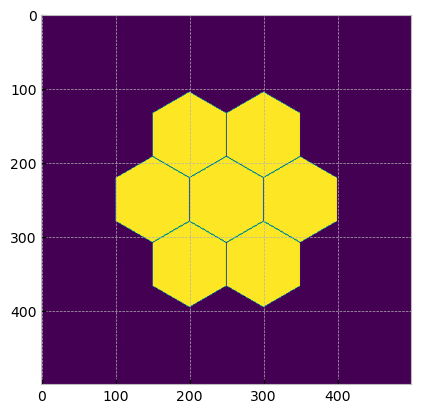

In [129]:
array=np.zeros((500,500))

centre=(250,250)
sampling=100
triangle_side=sampling*np.sqrt(3)/3

centres=[centre,(centre[0],centre[1]+sampling),(centre[0],centre[1]-sampling),(centre[0]-triangle_side*3/2-1,centre[1]+sampling/2),
         (centre[0]-triangle_side*3/2-1,centre[1]-sampling/2),(centre[0]+triangle_side*3/2+1,centre[1]+sampling/2),(centre[0]+triangle_side*3/2+1,centre[1]-sampling/2)]


for centre in centres:
    #line1
    L_16_m=0
    L_16_c=centre[1]+sampling/2

    #line4
    L_34_m=0
    L_34_c=centre[1]-sampling/2


    P_1=(centre[0]+triangle_side/2,L_16_c)
    P_2=(centre[0]+triangle_side,centre[1])
    P_3=(centre[0]+triangle_side/2,L_34_c)
    P_4=(centre[0]-triangle_side/2,L_34_c)
    P_5=(centre[0]-triangle_side,centre[1])
    P_6=(centre[0]-triangle_side/2,L_16_c)

    L_12_m,L_12_c=line(P_1,P_2)
    L_23_m,L_23_c=line(P_2,P_3)

    L_45_m,L_45_c=line(P_4,P_5)
    L_56_m,L_56_c=line(P_5,P_6)

    for y in range(0,len(array)):
        for x in range(0,len(array)):
            if y < L_16_c and y > L_34_c and y < L_56_m * x + L_56_c and y < L_12_m * x + L_12_c and y > L_23_m * x + L_23_c and y > L_45_m * x + L_45_c:
                array[x][y]=1 #SWAP TO ROTATE 90 degrees
plt.imshow(array)

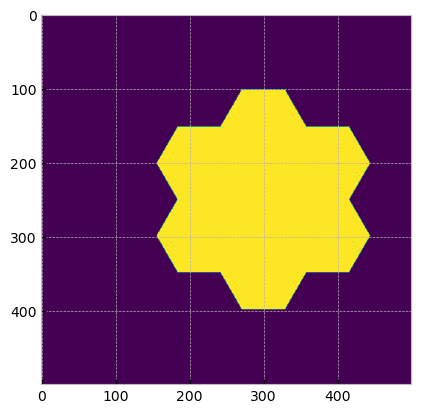

In [126]:
array=np.zeros((500,500))

centre=(300,250)
sampling=100
triangle_side=sampling*np.sqrt(3)/3

centres=[centre,(centre[0],centre[1]+sampling-1),(centre[0],centre[1]-sampling+1),(centre[0]-triangle_side*3/2,centre[1]+sampling/2-1),
         (centre[0]-triangle_side*3/2,centre[1]-sampling/2+1),(centre[0]+triangle_side*3/2,centre[1]+sampling/2-1),(centre[0]+triangle_side*3/2,centre[1]-sampling/2+1)]


for centre in centres:
    #line1
    L_16_m=0
    L_16_c=centre[1]+sampling/2

    #line4
    L_34_m=0
    L_34_c=centre[1]-sampling/2

    P_1=(centre[0]+triangle_side/2,L_16_c)
    P_2=(centre[0]+triangle_side,centre[1])
    P_3=(centre[0]+triangle_side/2,L_34_c)
    P_4=(centre[0]-triangle_side/2,L_34_c)
    P_5=(centre[0]-triangle_side,centre[1])
    P_6=(centre[0]-triangle_side/2,L_16_c)

    L_12_m,L_12_c=line(P_1,P_2)
    L_23_m,L_23_c=line(P_2,P_3)

    L_45_m,L_45_c=line(P_4,P_5)
    L_56_m,L_56_c=line(P_5,P_6)

    for y in range(0,len(array)):
        for x in range(0,len(array)):
            if y < L_16_c and y > L_34_c and y < L_56_m * x + L_56_c and y < L_12_m * x + L_12_c and y > L_23_m * x + L_23_c and y > L_45_m * x + L_45_c:
                array[y][x]=1
                
plt.imshow(array)

In [361]:
theta=np.deg2rad(29)
centre=(250,250)
centre_0=centre
centre_1=[centre[0]-sampling*np.sin(theta),centre[1]-sampling*np.cos(theta)]
print(centre_1)
centres=[centre_0,centre_1]

[201.5190379753663, 162.5380292860604]


In [458]:
theta=np.deg2rad(0)
centre=(300,200)
centre_0=centre
centre_1=[centre[0]-sampling*np.sin(theta),centre[1]-sampling*np.cos(theta)]
centre_2=[centre[0]-sampling*np.sin(theta),centre[1]+sampling*np.cos(theta)]
centre_3=[centre[0]+triangle_side*3/2+1,centre[1]+sampling/2]
centres=[centre_0,centre_1,centre_2,centre_3]

In [459]:
array=np.zeros((500,500))


sampling=100
triangle_side=sampling*np.sqrt(3)/3

for centre in centres:
    if theta == np.deg2rad(-30) or theta == np.deg2rad(30):
        print("pls no")
    else:
        P_1=(centre[0]+triangle_side*np.sin(theta+np.deg2rad(30)),centre[1]+triangle_side*np.cos(theta+np.deg2rad(30)))
        P_6=(centre[0]-triangle_side*np.cos(theta+np.deg2rad(60)),centre[1]+triangle_side*np.sin(theta+np.deg2rad(60)))
        P_2=(centre[0]+triangle_side*np.cos(theta),centre[1]-triangle_side*np.sin(theta))
        P_4=(centre[0]-triangle_side*np.sin(theta+np.deg2rad(30)),centre[1]-triangle_side*np.cos(theta+np.deg2rad(30)))
        P_3=(centre[0]+triangle_side*np.cos(theta+np.deg2rad(60)),centre[1]-triangle_side*np.sin(theta+np.deg2rad(60)))
        P_5=(centre[0]-triangle_side*np.cos(theta),centre[1]+triangle_side*np.sin(theta))

        L_12_m,L_12_c=line(P_1,P_2)
        L_23_m,L_23_c=line(P_2,P_3)
        L_34_m,L_34_c=line(P_3,P_4)
        L_45_m,L_45_c=line(P_4,P_5)
        L_56_m,L_56_c=line(P_5,P_6)
        L_16_m,L_16_c=line(P_6,P_1)
        for x in range(0,len(array)):
            for y in range(0,len(array)):
                if y < L_16_m * x + L_16_c and y > L_34_m * x + L_34_c and y < L_56_m * x + L_56_c and y < L_12_m * x + L_12_c and y > L_23_m * x + L_23_c and y > L_45_m * x + L_45_c:
                    array[x][y]=1

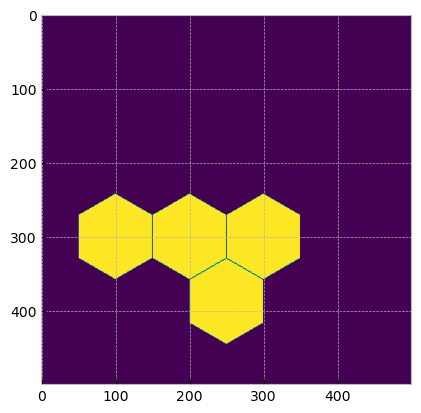

In [460]:
plt.imshow(array)